In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [18]:
path = 'data'
file = 'intellab.txt'

df = pd.read_csv(f'{path}/{file}', sep=' ', header=None)

# rename columns
df.columns = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']

# select moteid 1
df = df[df['moteid'] == 1]
df = df.drop(['moteid'], axis=1)

# transform date and time to linux timestamp
datetime_series = pd.to_datetime(df['date'] + ' ' + df['time'])
df['datetime'] = datetime_series
df['timestamp'] = datetime_series.apply(lambda x: x.timestamp())

# sort by timestamp
df = df.sort_values(by=['timestamp'])

Text(0.5, 1.0, 'Number of samples per day')

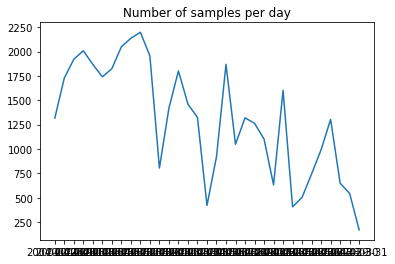

In [19]:
plt.plot(df.groupby('date').size())
plt.title('Number of samples per day')

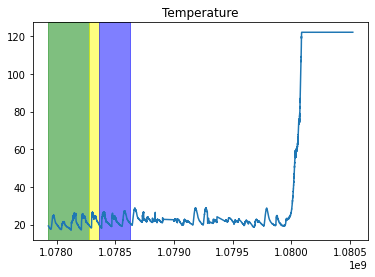

In [20]:
first_ts = df['timestamp'].iloc[0]
first_day = 0
days = 30

df_plot = df.query(f'{first_ts + 60*60*24*first_day} < timestamp and timestamp < {first_ts + 60*60*24*(first_day + days)}')
# plot temperature
plt.title('Temperature')
plt.plot(df_plot['timestamp'], df_plot['temperature'])
# mark areas of first 4 days as training data
plt.axvspan(df_plot['timestamp'].iloc[0], df_plot['timestamp'].iloc[0] + 60*60*24*4, alpha=0.5, color='green')
plt.axvspan(df_plot['timestamp'].iloc[0] + 60*60*24*4, df_plot['timestamp'].iloc[0] + 60*60*24*5, alpha=0.5, color='yellow')
plt.axvspan(df_plot['timestamp'].iloc[0] + 60*60*24*5, df_plot['timestamp'].iloc[0] + 60*60*24*8, alpha=0.5, color='blue')

# Meta stock closing price

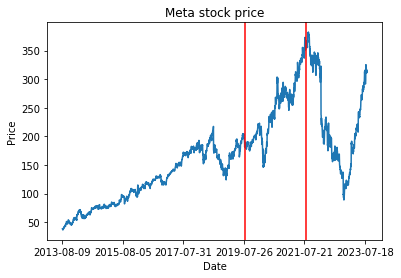

In [13]:
path = 'data'
file = 'META.csv'

df = pd.read_csv(f'{path}/{file}')

plt.plot(df['Date'], df['Close'])
# don't show every date
plt.xticks(df['Date'][::500])
plt.title('Meta stock price')
plt.xlabel('Date')
plt.ylabel('Price')
# make vertical lines for training, validation and test data
plt.axvline(df['Date'][1510], color='red')
plt.axvline(df['Date'][2013], color='red')
plt.show()